<a href="https://colab.research.google.com/github/pigeongcc/RecSys_IUTestTask/blob/main/RecSys_IUTestTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prerequisites

Please, download **my versions** of the dataset files from the following Goggle Drive link:

https://drive.google.com/drive/folders/1XtAvPAPzd3UQn9c_Ek8gZNmlM_Vf_sdw?usp=sharing

# Data Analysis & Preprocessing

Firstly, let's take a look at the data.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import chardet

In [ ]:
users_path = './users.csv'
with open(users_path, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
users_encoding = result['encoding']
print('Encoding for ' + users_path + ': ' + users_encoding)

games_path = './games.csv'
with open(games_path, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
games_encoding = result['encoding']
print('Encoding for ' + games_path + ': ' + games_encoding)

Encoding for ./users.csv: ascii
Encoding for ./games.csv: utf-8


### Opening *users.csv*

In [ ]:
users = pd.read_csv(users_path, encoding=users_encoding)
users.columns = ['user_id', 'game_id', 'rating']
users.head()

,user_id,game_id,rating
0,1,147,1.9;
1,1,198,5.0;
2,1,137,9.0;
3,1,197,5.1;
4,2,9,7.4;


In [ ]:
users.dtypes    # rating should be of type float

user_id     int64
game_id     int64
rating     object
dtype: object

Let's break down the columns of *users.csv* by types:

In [ ]:
users_num_cols = [
    'user_id',
    'game_id'
]

target_col = 'rating'

#users_cols = users_num_cols + [target_col]

In [ ]:
# Remove the ';' symbol from rating, and cast rating column to int64
users['rating'] = users['rating'].str.replace(';', '').str.rstrip('.')
users.rating = pd.to_numeric(users.rating)
users.head()

,user_id,game_id,rating
0,1,147,1.9
1,1,198,5.0
2,1,137,9.0
3,1,197,5.1
4,2,9,7.4


In [ ]:
users.dtypes    # now it's ok

user_id      int64
game_id      int64
rating     float64
dtype: object

In [ ]:
# check users.csv for duplicates
users.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5465    False
5466    False
5467    False
5468    False
5469    False
Length: 5470, dtype: bool

In [ ]:
# check users.csv for missing values
users.isna().mean()

user_id    0.0
game_id    0.0
rating     0.0
dtype: float64

### Opening *games.csv*

In [ ]:
games = pd.read_csv(games_path, encoding=games_encoding)
games.rename(columns = {'id_game':'game_id', 'price;':'price'}, inplace = True)
games.iloc[0:10,:]

,game_id,title,genre,price
0,1,Terraria(2011),Open World Survival Craft,$9.99;
1,2,Portal 2(2011),Platformer,$9.99;
2,3,Stardew Valley(2016),Farming Sim,$14.99;
3,4,Hades(2020),Action Roguelike,$24.99;
4,5,Left 4 Dead 2(2009),Zombies,$9.99;
5,6,People Playground(2019),Sandbox,$9.99;
6,7,Euro Truck Simulator 2(2012),Transportation,$19.99;
7,8,Vampire Survivors(2021),Action Roguelike,$2.69;
8,9,RimWorld(2018),Colony Sim,$34.99;
9,10,Portal(2007),Puzzle,$9.99;


In [ ]:
games.dtypes

game_id     int64
title      object
genre      object
price      object
dtype: object

Let's break down the columns of *games.csv* by types:

In [ ]:
games_num_cols = [
    'game_id',
    'price'
]

games_cat_cols = [
    'genre'
]

games_other_cols = [        
    'title'
]

#games_cols = games_num_cols + games_cat_cols + games_other_cols

In [ ]:
# check games.csv for duplicates
games.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
245    False
246    False
247    False
248    False
249    False
Length: 250, dtype: bool

In [ ]:
# check games.csv for missing values
games.isna().mean()

game_id    0.0
title      0.0
genre      0.0
price      0.0
dtype: float64

In [ ]:
# remove the .csv semicolon delimeter and the dollar sign
games['price'] = games['price'].str.replace(';', '')
games['price'] = games['price'].str.replace('$', '')

# Replace the 'Free' price with 0.0
games.loc[games['price'].str.lower() == 'free', 'price'] = '0.00'
games.iloc[0:17]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


,game_id,title,genre,price
0,1,Terraria(2011),Open World Survival Craft,9.99
1,2,Portal 2(2011),Platformer,9.99
2,3,Stardew Valley(2016),Farming Sim,14.99
3,4,Hades(2020),Action Roguelike,24.99
4,5,Left 4 Dead 2(2009),Zombies,9.99
5,6,People Playground(2019),Sandbox,9.99
6,7,Euro Truck Simulator 2(2012),Transportation,19.99
7,8,Vampire Survivors(2021),Action Roguelike,2.69
8,9,RimWorld(2018),Colony Sim,34.99
9,10,Portal(2007),Puzzle,9.99


In [ ]:
# Cast price column to float64

games['price'] = pd.to_numeric(games['price'])
games.iloc[0:17]

,game_id,title,genre,price
0,1,Terraria(2011),Open World Survival Craft,9.99
1,2,Portal 2(2011),Platformer,9.99
2,3,Stardew Valley(2016),Farming Sim,14.99
3,4,Hades(2020),Action Roguelike,24.99
4,5,Left 4 Dead 2(2009),Zombies,9.99
5,6,People Playground(2019),Sandbox,9.99
6,7,Euro Truck Simulator 2(2012),Transportation,19.99
7,8,Vampire Survivors(2021),Action Roguelike,2.69
8,9,RimWorld(2018),Colony Sim,34.99
9,10,Portal(2007),Puzzle,9.99


In [ ]:
games.dtypes

game_id      int64
title       object
genre       object
price      float64
dtype: object

### Deriving a new feature: is a game free?



In [ ]:
games['is_free'] = games['price'] == 0
games_cat_cols.append('is_free')
games.iloc[15:18]

,game_id,title,genre,price,is_free
15,16,Factorio(2020),Automation,30.00,False
16,17,Helltaker(2020),Cute,0.00,True
17,18,Mount & Blade: Warband(2010),Medieval,19.99,False


### Deriving a new feature: year of a game



In [ ]:
games['year'] = games['title'].str[-6:].str.replace('(', '').str.replace(')', '')
games['year'] = pd.to_numeric(games['year'])
games.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


,game_id,title,genre,price,is_free,year
0,1,Terraria(2011),Open World Survival Craft,9.99,False,2011
1,2,Portal 2(2011),Platformer,9.99,False,2011
2,3,Stardew Valley(2016),Farming Sim,14.99,False,2016
3,4,Hades(2020),Action Roguelike,24.99,False,2020
4,5,Left 4 Dead 2(2009),Zombies,9.99,False,2009


In [ ]:
games.dtypes

game_id      int64
title       object
genre       object
price      float64
is_free       bool
year         int64
dtype: object

### Encoding the genre feature

In [ ]:
games['genre'] = games['genre'].astype(str)
genres = np.unique(games['genre'])
print(f"There are {len(genres)} genres in the dataset:")
genres

There are 93 genres in the dataset:


array(['2D Fighter', '2D Platformer', 'Action', 'Action Roguelike',
       'Adventure', 'America', 'Anime', 'Arena Shooter', 'Atmospheric',
       'Automation', 'Automobile Sim', 'Base Building', 'Beautiful',
       'Building', 'Bullet Hell', 'Capitalism', 'Card Battler', 'Casual',
       'City Builder', 'Clicker', 'Co-op', 'Colony Sim', 'Comedy', 'Cute',
       'Cyberpunk', 'Dating Sim', 'Destruction', 'Detective', 'Difficult',
       'Emotional', 'Exploration', 'FPS', 'Farming Sim', 'Flight',
       'Funny', 'Great Soundtrack', 'Hentai', 'Hero Shooter',
       'Hidden Object', 'Horror', 'JRPG', 'LEGO', 'LGBTQ+', 'Loot',
       'Management', 'Medieval', 'Metroidvania', 'Minimalist',
       'Multiple Endings', 'Music', 'Mystery', 'Narrative', 'Nudity',
       'Open World', 'Open World Survival Craft', 'Philosophical',
       'Physics', 'Pixel Graphics', 'Platformer', 'Political',
       'Precision Platformer', 'Psychedelic', 'Psychological Horror',
       'Puzzle', 'Puzzle Platformer',

From above, we can conclude that (thanks God!) the genre values are "atomic", i.e. there are no combinations of genre for any game.

Let's take a look at the genres distribution:

In [ ]:
print("Genres distribution:")
genre_counts = games['genre'].value_counts()
print(genre_counts)

Genres distribution:
FPS                  15
Action               12
Puzzle               10
Visual Novel          9
Adventure             8
                     ..
LGBTQ+                1
Survival Horror       1
Roguelike             1
City Builder          1
Puzzle Platformer     1
Name: genre, Length: 93, dtype: int64


Let's now assign all the genres that are represented with **<= *rare_genre_limit*** games to the group of genre ***Rare***:

In [ ]:
rare_genre_limit = 0
rare_genre_counts = genre_counts[genre_counts <= rare_genre_limit]
rare_genre_counts

Series([], Name: genre, dtype: int64)

In [ ]:
rare_genres_list = list(rare_genre_counts.index)
rare_genres_list

[]

In [ ]:
games.loc[games['genre'].isin(rare_genres_list), 'genre'] = 'Rare'

In [ ]:
print("New genres distribution:")
genre_counts = games['genre'].value_counts()
print(genre_counts)

New genres distribution:
FPS                  15
Action               12
Puzzle               10
Visual Novel          9
Adventure             8
                     ..
LGBTQ+                1
Survival Horror       1
Roguelike             1
City Builder          1
Puzzle Platformer     1
Name: genre, Length: 93, dtype: int64


Let's apply one-hot-encoding for the genres:

In [ ]:
from sklearn.preprocessing import LabelEncoder

# map genres to numbers
genre_le = LabelEncoder()
genre_labels = genre_le.fit_transform(games['genre'])

genre_mappings = {index: label for index, label in 
                  enumerate(genre_le.classes_)}
n = 10
print(f"Some {n} elements from the genre mapping:")
{k: genre_mappings[k] for k in list(genre_mappings)[:n]}

Some 10 elements from the genre mapping:


{0: '2D Fighter',
 1: '2D Platformer',
 2: 'Action',
 3: 'Action Roguelike',
 4: 'Adventure',
 5: 'America',
 6: 'Anime',
 7: 'Arena Shooter',
 8: 'Atmospheric',
 9: 'Automation'}

In [ ]:
games['genre_label'] = genre_labels
games.head()

,game_id,title,genre,price,is_free,year,genre_label
0,1,Terraria(2011),Open World Survival Craft,9.99,False,2011,54
1,2,Portal 2(2011),Platformer,9.99,False,2011,58
2,3,Stardew Valley(2016),Farming Sim,14.99,False,2016,32
3,4,Hades(2020),Action Roguelike,24.99,False,2020,3
4,5,Left 4 Dead 2(2009),Zombies,9.99,False,2009,92


In [ ]:
games['genre_label'].dtype

dtype('int64')

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# one-hot-encoding of genres
genre_ohe = OneHotEncoder()
genre_feature_arr = genre_ohe.fit_transform(games[['genre_label']]).toarray()
genre_feature_labels = list(genre_le.classes_)

genre_features = pd.DataFrame(genre_feature_arr, columns=genre_feature_labels)
genre_features = genre_features.astype('int32')

games_genre_ohe_cols = list(genre_features.columns)

genre_features.head()

,2D Fighter,2D Platformer,Action,Action Roguelike,Adventure,America,Anime,Arena Shooter,Atmospheric,Automation,...,Strategy,Survival,Survival Horror,Tactical RPG,Third-Person Shooter,Tower Defense,Transportation,Turn-Based Strategy,Visual Novel,Zombies
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
games = pd.concat([games, genre_features], axis=1)
games.head()

,game_id,title,genre,price,is_free,year,genre_label,2D Fighter,2D Platformer,Action,...,Strategy,Survival,Survival Horror,Tactical RPG,Third-Person Shooter,Tower Defense,Transportation,Turn-Based Strategy,Visual Novel,Zombies
0,1,Terraria(2011),Open World Survival Craft,9.99,False,2011,54,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Portal 2(2011),Platformer,9.99,False,2011,58,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Stardew Valley(2016),Farming Sim,14.99,False,2016,32,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Hades(2020),Action Roguelike,24.99,False,2020,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Left 4 Dead 2(2009),Zombies,9.99,False,2009,92,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
games.columns

Index(['game_id', 'title', 'genre', 'price', 'is_free', 'year', 'genre_label',
       '2D Fighter', '2D Platformer', 'Action', 'Action Roguelike',
       'Adventure', 'America', 'Anime', 'Arena Shooter', 'Atmospheric',
       'Automation', 'Automobile Sim', 'Base Building', 'Beautiful',
       'Building', 'Bullet Hell', 'Capitalism', 'Card Battler', 'Casual',
       'City Builder', 'Clicker', 'Co-op', 'Colony Sim', 'Comedy', 'Cute',
       'Cyberpunk', 'Dating Sim', 'Destruction', 'Detective', 'Difficult',
       'Emotional', 'Exploration', 'FPS', 'Farming Sim', 'Flight', 'Funny',
       'Great Soundtrack', 'Hentai', 'Hero Shooter', 'Hidden Object', 'Horror',
       'JRPG', 'LEGO', 'LGBTQ+', 'Loot', 'Management', 'Medieval',
       'Metroidvania', 'Minimalist', 'Multiple Endings', 'Music', 'Mystery',
       'Narrative', 'Nudity', 'Open World', 'Open World Survival Craft',
       'Philosophical', 'Physics', 'Pixel Graphics', 'Platformer', 'Political',
       'Precision Platformer', 'Psy

### Analysis & Other steps

In [ ]:
games.iloc[68:76]

,game_id,title,genre,price,is_free,year,genre_label,2D Fighter,2D Platformer,Action,...,Strategy,Survival,Survival Horror,Tactical RPG,Third-Person Shooter,Tower Defense,Transportation,Turn-Based Strategy,Visual Novel,Zombies
68,69,Divinity: Original Sin 2 - Definitive Edition(...,Tactical RPG,44.99,False,2017,86,0,0,0,...,0,0,0,1,0,0,0,0,0,0
69,70,Broforce(2015),America,14.99,False,2015,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
70,71,Ori and the Will of the Wisps(2020),Beautiful,9.89,False,2020,12,0,0,0,...,0,0,0,0,0,0,0,0,0,0
71,72,Papers Please(2013),Political,9.99,False,2013,59,0,0,0,...,0,0,0,0,0,0,0,0,0,0
72,73,Oxygen Not Included(2019),Colony Sim,24.99,False,2019,21,0,0,0,...,0,0,0,0,0,0,0,0,0,0
73,74,Ravenfield(2017),FPS,14.99,False,2017,31,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74,75,Half-Life(1998),FPS,9.99,False,1998,31,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75,76,God of War(2022),Action,49.99,False,2022,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
games['game_id'] = games['game_id'].astype('int64')

In [ ]:
# show users who rated unknown games
users['game_id_exists'] = users['game_id'].isin(games['game_id'])

wrong_users = users[users['game_id_exists'] == False]
wrong_users

,user_id,game_id,rating,game_id_exists


In [ ]:
# leave the entries with existent games only
init_users_len = len(users)
wrong_users_len = len(wrong_users)
users = users.loc[users['game_id_exists']]

# check if all the game_id in users.csv are present in games.csv
#assert len(users) == init_users_len - wrong_users_len, "Wrong users drop failed."

assert all(users['game_id_exists']), "users.csv contains invalid game id."
#assert (users.game_id in games.game_id).all(), "users.csv contains invalid game id"
#assert all([user_game_id in games.game_id for user_game_id in users.game_id]), "users.csv contains invalid game id"

In [ ]:
len(games.columns)

100

Check the categorical features distrivution:

In [ ]:
for games_cat_col in games_cat_cols:
    print(f"{games_cat_col} DISTRIBUTION")
    print(games[games_cat_col].value_counts())
    print()

genre DISTRIBUTION
FPS                  15
Action               12
Puzzle               10
Visual Novel          9
Adventure             8
                     ..
LGBTQ+                1
Survival Horror       1
Roguelike             1
City Builder          1
Puzzle Platformer     1
Name: genre, Length: 93, dtype: int64

is_free DISTRIBUTION
False    224
True      26
Name: is_free, dtype: int64



Check the features distribution:

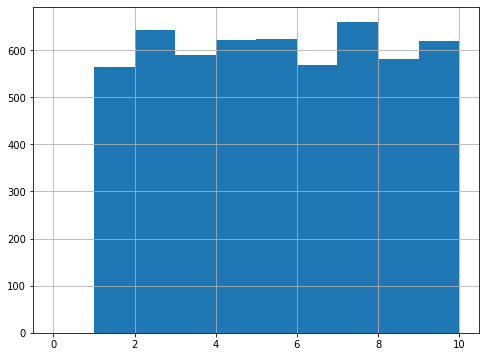

In [ ]:
users.rating.hist(bins=10, range=(0,10), figsize=(8, 6))
None

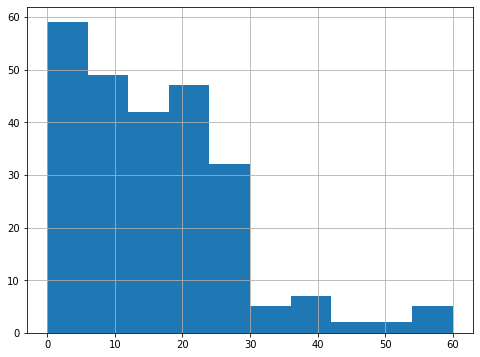

In [ ]:
games.price.hist(bins=10, figsize=(8, 6))
None

# SVD Model (scikit-surprise)

## Data Preparation

In [ ]:
users.columns

Index(['user_id', 'game_id', 'rating', 'game_id_exists'], dtype='object')

In [ ]:
users_surprise_cols = ['user_id', 'game_id', 'rating']

## Configuring the Model

Install the scikit-surprise package:

In [ ]:
!pip install scikit-surprise

Load the dataset into surprise's Dataset object:

In [ ]:
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate

reader = Reader(rating_scale=(1, 10))

# The columns must correspond to user id, item id and ratings (in that order)
ratings_data = Dataset.load_from_df(users[users_surprise_cols], reader)

In [ ]:
users.head()

,user_id,game_id,rating,game_id_exists
0,1,147,1.9,True
1,1,198,5.0,True
2,1,137,9.0,True
3,1,197,5.1,True
4,2,9,7.4,True


Train the algorithm using cross-validation:

In [ ]:
from surprise import SVD

alg = SVD()

cross_validate(alg, ratings_data, measures=['RMSE', 'MAE'], cv=10, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    2.6524  2.6412  3.6608  2.6652  2.7938  2.6831  2.6337  2.6214  2.6008  2.6991  2.7651  0.3029  
MAE (testset)     2.2840  2.2678  2.3531  2.3089  2.3663  2.3388  2.2421  2.2432  2.2419  2.2972  2.2943  0.0444  
Fit time          0.83    0.70    0.80    0.82    0.69    0.65    0.29    0.29    0.28    0.29    0.56    0.23    
Test time         0.01    0.01    0.01    0.01    0.02    0.01    0.00    0.00    0.00    0.00    0.01    0.01    


{'fit_time': (0.8264017105102539,
  0.7005863189697266,
  0.8021032810211182,
  0.8229007720947266,
  0.6862277984619141,
  0.6531169414520264,
  0.29018688201904297,
  0.2857069969177246,
  0.2811143398284912,
  0.28771448135375977),
 'test_mae': array([2.28398563, 2.26775946, 2.35311987, 2.30893352, 2.36626734,
        2.33882821, 2.24212743, 2.24316239, 2.24185885, 2.29724156]),
 'test_rmse': array([2.65241151, 2.64124339, 3.66083622, 2.66515095, 2.79377437,
        2.68306571, 2.63366857, 2.62135317, 2.60077725, 2.69912111]),
 'test_time': (0.006560087203979492,
  0.006756782531738281,
  0.00907588005065918,
  0.006439924240112305,
  0.022073745727539062,
  0.0065233707427978516,
  0.0037937164306640625,
  0.0037355422973632812,
  0.003714323043823242,
  0.004014730453491211)}

# RecSys

The script below will show *top-N* recommendations for a given *user_id*:

In [ ]:
num_of_recs = 5
user_id = 600

recs = {}

for game_id in games['game_id']:
    prediction = alg.predict(user_id, game_id)
    recs[game_id] = prediction.est

recs_sorted = dict(sorted(recs.items(), key=lambda item: item[1], reverse = True))

i = 0
print(f'Recommendations for user_id {user_id}:')
for rec in recs_sorted.items():
    if i == num_of_recs:
        break
    else:
        i += 1

    game_id = rec[0]
    game_title = games.loc[games['game_id'] == game_id, 'title'].iloc[0]
    pred = rec[1]
    print(f"{i}. {game_title}.")
    print(f"Predicted rating: {pred}")
    print()


Recommendations for user_id 600:
1. The Room(2014).
Predicted rating: 9.057377836745454

2. Portal 2(2011).
Predicted rating: 7.0674325169705075

3. Teardown(2020).
Predicted rating: 6.766736358539827

4. Fallout: New Vegas(2010).
Predicted rating: 6.693285854635773

5. Beat Saber(2019).
Predicted rating: 6.687812514251482



# Results

#### Performance

Root mean squared error on the test set is around 2.7

Such a large value is obtained due to the so-called *cold start* problem. The dataset contains 1000 users and 250 games, with appeoximately 3-6 games rated by each user. Hence, we obtain a 1000 by 250 rating matrix with only 3-6 cells filled in each row. This matrix is *sparse*. With sparse rating matrix, it is hard to obtain good results using collaborative filtering or SVD (singular value decomposition) algorithms.

#### What's further?

I definitely want to see how content-based filtering would perform with this dataset. As opposed to collaborative filtering and SVD algorithms, content-based filtering takes into account the item and user features, e.g. the features I was deriving and processing at the beginning of this notebook. 
